<a href="https://colab.research.google.com/github/Nouvalgt/awikwok/blob/main/inimentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memanggil dataset dari google drive
data = pd.read_csv('/content/drive/MyDrive/awikwok/Student Mental health.csv')
# Cek isi dataset
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
# Converting categorical columns into numeric using Label Encoding
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
data['Choose your gender'] = label_encoder.fit_transform(data['Choose your gender'])
data['Marital status'] = label_encoder.fit_transform(data['Marital status'])
data['Do you have Depression?'] = label_encoder.fit_transform(data['Do you have Depression?'])
data['Do you have Anxiety?'] = label_encoder.fit_transform(data['Do you have Anxiety?'])
data['Do you have Panic attack?'] = label_encoder.fit_transform(data['Do you have Panic attack?'])
data['Did you seek any specialist for a treatment?'] = label_encoder.fit_transform(data['Did you seek any specialist for a treatment?'])

# Checking the data after conversion
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [6]:
# Extracting the middle value from the CGPA range and converting it to float
def convert_cgpa(cgpa_range):
    # Splitting the range by ' - ' and calculating the average
    if isinstance(cgpa_range, str):
        cgpa_min, cgpa_max = cgpa_range.split(' - ')
        return (float(cgpa_min) + float(cgpa_max)) / 2
    return cgpa_range  # for cases where the value is already numeric

# Applying the function to the 'What is your CGPA?' column
data['What is your CGPA?'] = data['What is your CGPA?'].apply(convert_cgpa)

# Checking the data after conversion
data.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.245,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.245,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.245,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.245,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.245,0,0,0,0,0


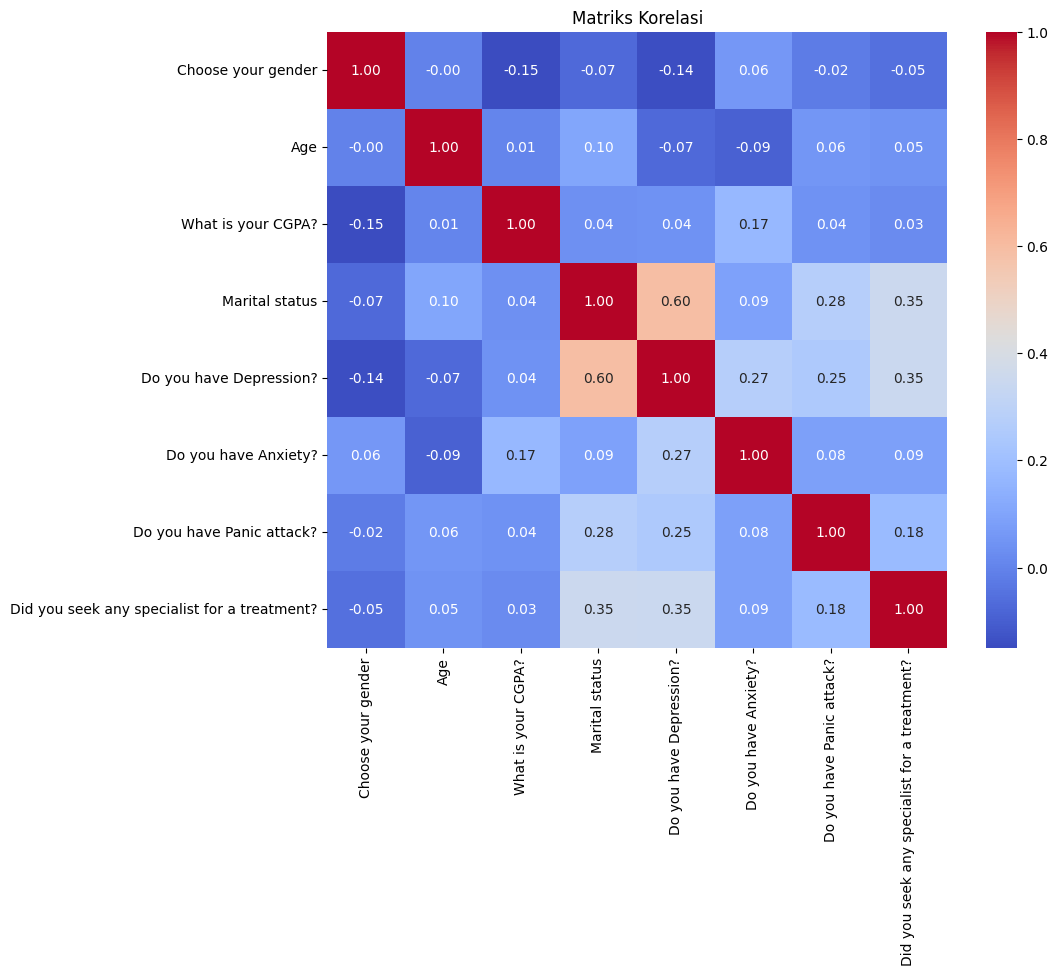

In [7]:
# Drop the 'Timestamp' column since it's not relevant for correlation
data_cleaned = data.drop(columns=['Timestamp'])

# Memilih hanya kolom numerik
data_numerik = data.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = data_numerik.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()


In [8]:
data.describe()

,Choose your gender,Age,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,101.000000,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.257426,20.53000,3.356287,0.158416,0.346535,0.336634,0.326733,0.059406
std,0.439397,2.49628,0.585152,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.00000,0.995000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.00000,3.750000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [10]:
# Imputasi missing value di kolom 'Age' dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
# Checking for missing values after Imputation
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [12]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate Entries: {duplicates}")


Duplicate Entries: 0


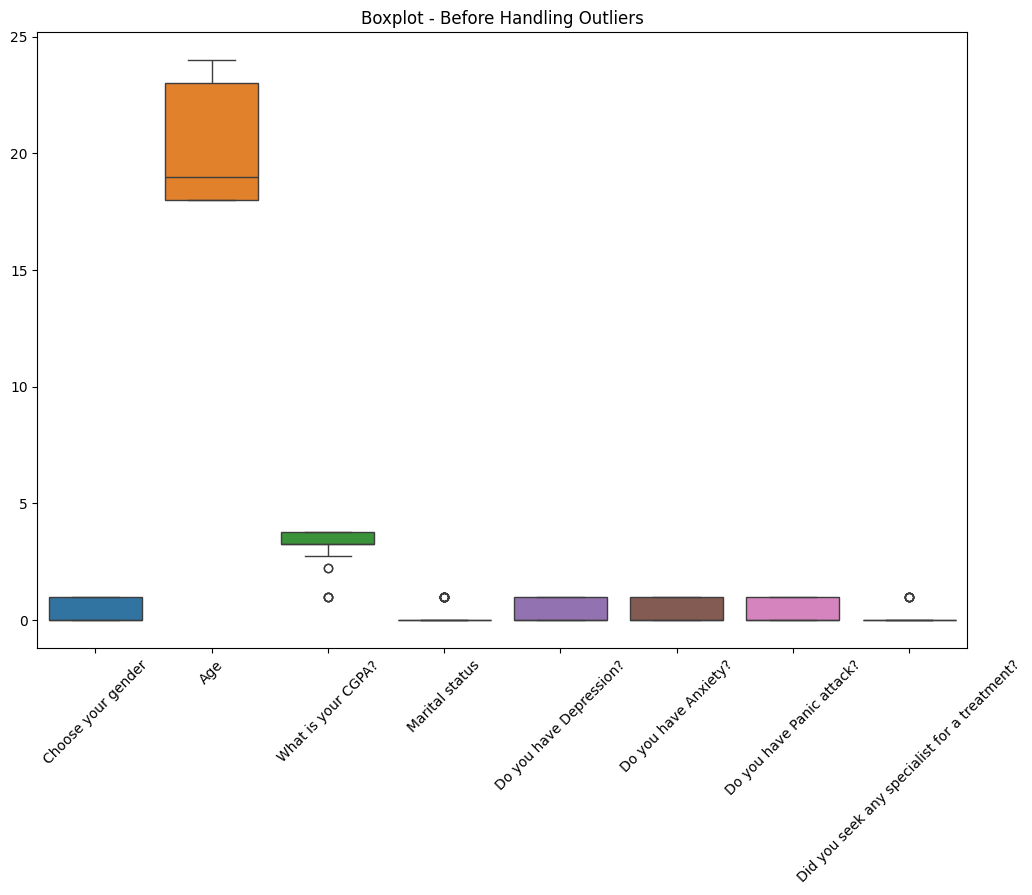

In [13]:
# Defining the numeric columns (excluding the 'Timestamp' column)
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Using IQR to detect and handle outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Visualizing the outliers before handling
plt.figure(figsize=(12,8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot - Before Handling Outliers')
plt.xticks(rotation=45)
plt.show()


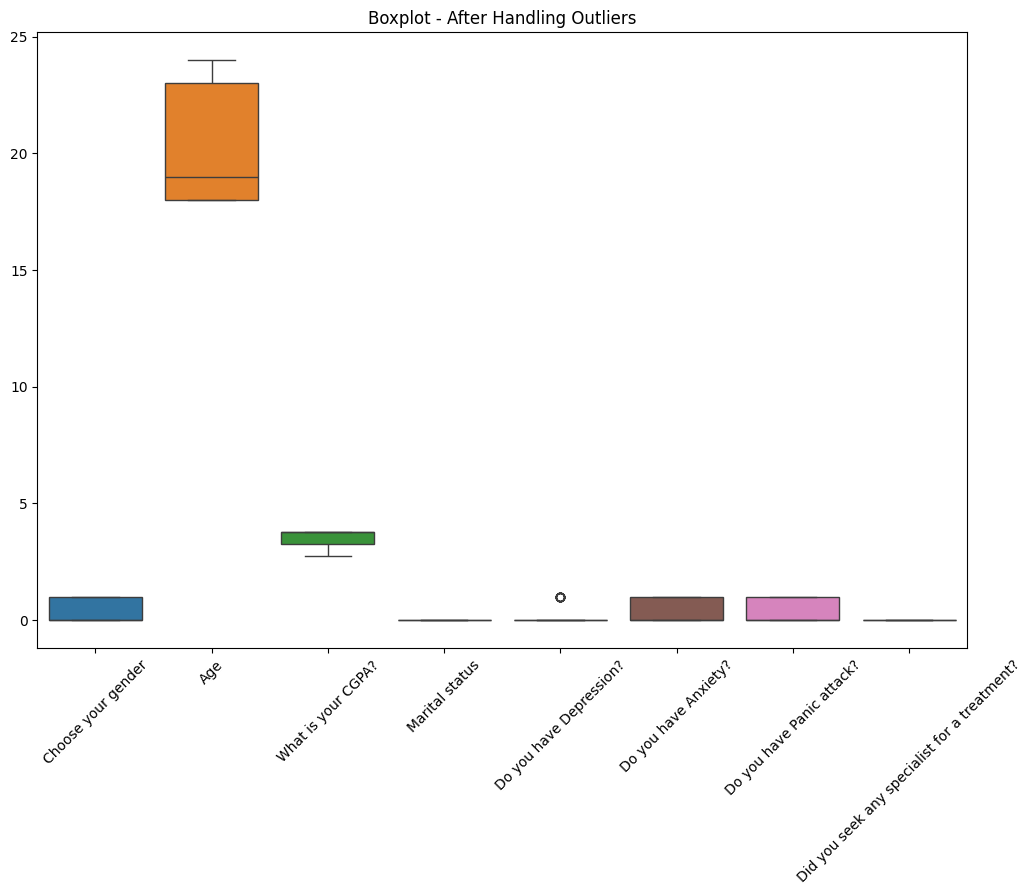

In [14]:
# Handling outliers by removing them
data_cleaned_no_outliers = data[~outlier_condition.any(axis=1)]

# Visualizing the data after handling outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data_cleaned_no_outliers[numeric_columns])
plt.title('Boxplot - After Handling Outliers')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Menambahkan kolom 'Did you seek any specialist for a treatment?' ke dalam daftar relevan
relevant_columns = ['Age', 'Marital status', 'Do you have Depression?',
                    'Do you have Anxiety?', 'Do you have Panic attack?',
                    'What is your CGPA?', 'Did you seek any specialist for a treatment?']

# Menyaring data berdasarkan kolom-kolom yang relevan
data_clustering = data[relevant_columns]

# Normalisasi data menggunakan Min-Max Scaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_clustering)

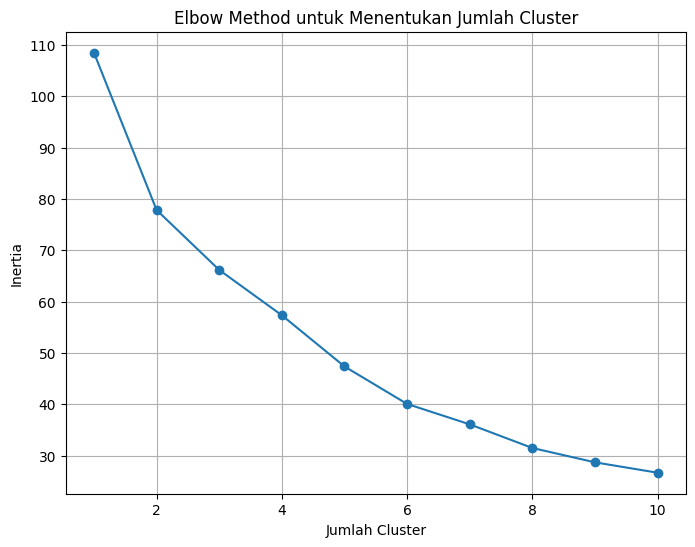

In [16]:
# Menentukan jumlah cluster yang optimal menggunakan metode Elbow
inertia = []
range_cluster = range(1, 11)  # Mencoba jumlah cluster dari 1 sampai 10

for n_clusters in range_cluster:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot untuk Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_cluster, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [17]:
# Menjalankan K-Means dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

# Menampilkan hasil clustering
print("Hasil Clustering:")
print(data[['Age', 'Marital status', 'Do you have Depression?',
            'Do you have Anxiety?', 'Do you have Panic attack?',
            'What is your CGPA?', 'Did you seek any specialist for a treatment?', 'Cluster']].head())

# Menampilkan pusat cluster
print("\nPusat Cluster:")
print(kmeans.cluster_centers_)

Hasil Clustering:
    Age  Marital status  Do you have Depression?  Do you have Anxiety?  \
0  18.0               0                        1                     0   
1  21.0               0                        0                     1   
2  19.0               0                        1                     1   
3  22.0               1                        1                     0   
4  23.0               0                        0                     0   

   Do you have Panic attack?  What is your CGPA?  \
0                          1               3.245   
1                          0               3.245   
2                          1               3.245   
3                          0               3.245   
4                          0               3.245   

   Did you seek any specialist for a treatment?  Cluster  
0                                             0        0  
1                                             0        1  
2                                             0

In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_normalized, data['Cluster'])
print(f"Silhouette Score untuk 2 Cluster: {silhouette_avg}")


Silhouette Score untuk 2 Cluster: 0.33129070575011066


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

silhouette_avg_3 = silhouette_score(data_normalized, data['Cluster'])
print(f"Silhouette Score untuk 3 Cluster: {silhouette_avg_3}")


Silhouette Score untuk 3 Cluster: 0.24400863713742996


In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

silhouette_avg_4 = silhouette_score(data_normalized, data['Cluster'])
print(f"Silhouette Score untuk 4 Cluster: {silhouette_avg_4}")


Silhouette Score untuk 4 Cluster: 0.2682907214695559


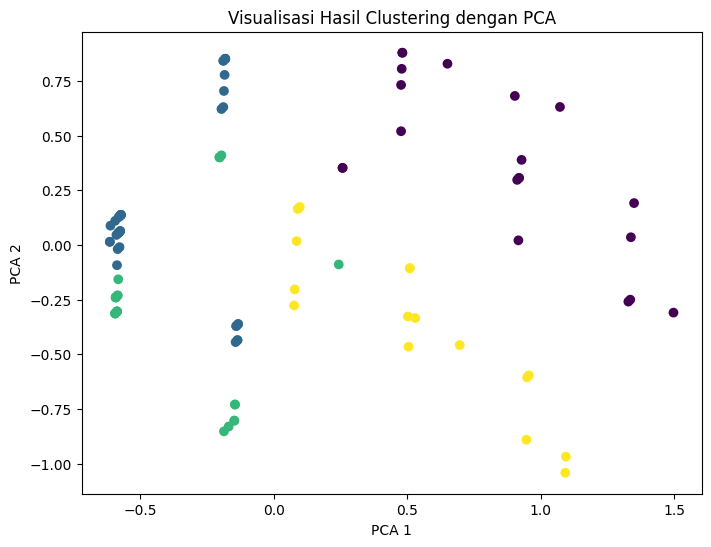

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
